In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.rand(100, 1)
X.shape, y.shape

((100, 1), (100, 1))

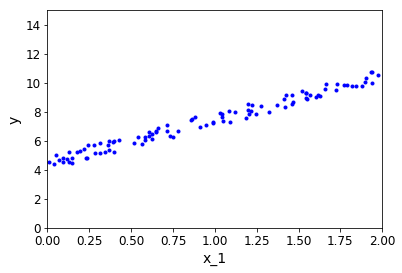

In [3]:
# b.-- blue and points, otherwise it will be line
plt.plot(X, y, 'b.')
plt.xlabel('x_1')
plt.ylabel('y')
# x axis range from 0 to 5, y axis range from 0 to 15
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]
X_b[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

![title](./1.png)
this is just a conincidence, actually we still need to do gradient descent to get the θ, only in this case we directly get the result

In [5]:
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta

array([[4.51359766],
       [2.98323418]])

In [7]:
# testing, initialize two x points
X_new = np.array([[0], [2]])
# add 1 columns for bias
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)
y_predict

array([[ 4.51359766],
       [10.48006601]])

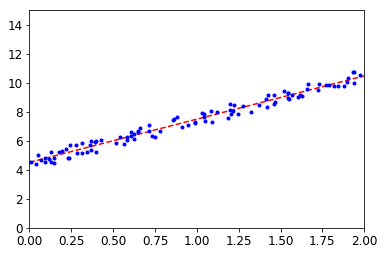

In [8]:
plt.plot(X_new, y_predict, 'r--')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
# using sklearn to get weights and bias
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
# coefficients(weights)
print(lin_reg.coef_)
# intercept(bias)
print(lin_reg.intercept_)

[[2.98323418]]
[4.51359766]


In [10]:
# Batch Gradient Descent(here we use whole batch)

![title](./2.png)

In [11]:
# learning rate
eta = 0.1
n_iterations = 1000
# sample number
m = 100
# randomly initialize weights
theta = np.random.randn(2, 1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [12]:
theta

array([[4.51359766],
       [2.98323418]])

In [13]:
X_new_b.dot(theta)

array([[ 4.51359766],
       [10.48006601]])

### now let's see how learning rate will effect result

In [14]:
# a list to save theta
theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path=None):
    # sample size
    m = len(X_b)
    # plot raw data
    plt.plot(X, y, 'b.')
    n_iterations = 1000
    for iteration in range(n_iterations):
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, 'b-')
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('X_1')
    plt.axis([0, 2, 0, 15])
    plt.title('eta = {}'.format(eta))

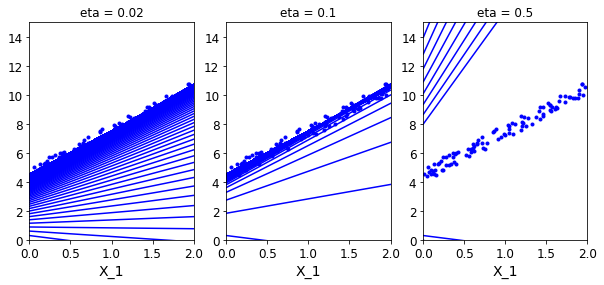

In [15]:
# 1 weight, 1 bias
theta = np.random.randn(2, 1)
# a slightly bigger figure size 
plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)
plt.show()

### Stochastic Gradient Descent

[[1.         0.54269806]]
[1.         0.54269806]


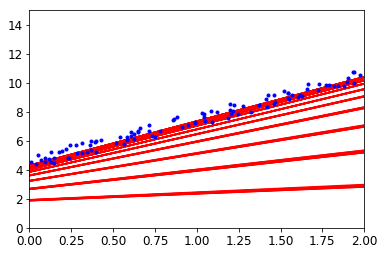

In [16]:
# a list to save theta
theta_path_sgd = []
m = len(X_b)
n_epochs = 50

t0 = 5
t1 = 50

def learning_rate_decay(t):
    return t0 / (t1 + t)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        # in order to save drawing, we only plot the first
        # 20 steps in the first epoch
        if epoch < 10 and i < 10:
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new, y_predict, 'r-')
        # randomly pick one sample
        random_index = np.random.randint(m)
        # X_b shape: [100, 2]
        # here we use X_b[random_index: random_index+1] since it returns a 
        # 2-D array so that we can do matrix computation next
        xi = X_b[random_index: random_index + 1]
        if epoch == 1 and i == 20: 
            print(xi)
            print(X_b[random_index])
        yi = y[random_index: random_index + 1]
        gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
        # current num of iterations: n_epochs * m + i 
        eta = learning_rate_decay(n_epochs * m + i)
        theta = theta - eta * gradient
        theta_path_sgd.append(theta)
        
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

### Mini-batch Gradient Descent

In [17]:
# a list to save theta(mini-batch)
theta_path_mgd = []
n_epochs = 50
# batch size
minibatch = 16
theta = np.random.randn(2, 1)
# np.random.seed(233)
t = 0
for epoch in range(n_epochs):
    # shuffle 
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    # each turn we train "minibatch size" samples
    for i in range(0, m, minibatch):
        t += 1
        xi = X_b_shuffled[i: i+minibatch]
        yi = y_shuffled[i: i+minibatch]
        gradients = 2/minibatch * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_rate_decay(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)   

In [18]:
theta

array([[4.4735684 ],
       [3.02037829]])

### compare 3 different gradient descent strategies

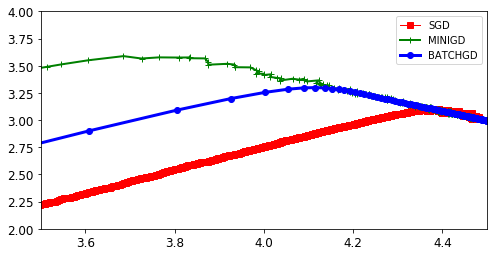

In [19]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(8, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], 'r-s', linewidth=1, label='SGD')
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], 'g-+', linewidth=2, label='MINIGD')
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], 'b-o', linewidth=3, label='BATCHGD')
plt.legend(loc='upper right')
plt.axis([3.5, 4.5, 2.0, 4.0])
plt.show()

### Polynomial Regression 

In [20]:
# First we build input data

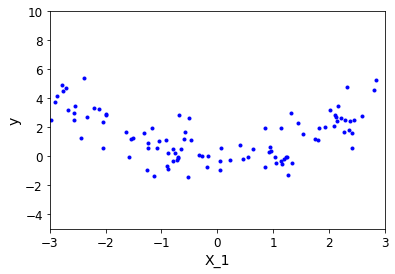

In [21]:
m = 100
# all the data range from -3 to 3
X = 6 * np.random.rand(m, 1) - 3
# add a Gaussian jitter(random.rand(m, 1))
y = 0.5 * (X ** 2) + np.random.randn(m, 1)
plt.plot(X, y, 'b.')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([-3, 3, -5, 10])
plt.show()

In [22]:
# 

In [23]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [24]:
# 1.54.. and 1.54.. * 2
X[0], X_poly[0]

(array([0.93707422]), array([0.93707422, 0.87810809]))

In [25]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
# weights
print(lin_reg.coef_)
# biases
print(lin_reg.intercept_)

[[-0.02446374  0.50284469]]
[-0.02550974]


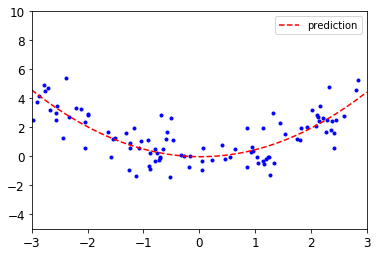

In [26]:
# build 100 test data
X_new = np.linspace(-3., 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r--', label='prediction')
plt.axis([-3, 3, -5, 10])
plt.legend()
plt.show()

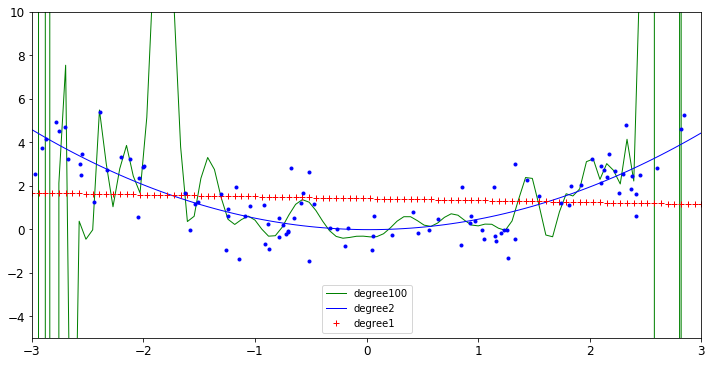

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(12, 6))
for style, width, degree in (('g-', 1, 100), ('b-', 1, 2), ('r+', 1, 1)):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    std = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ('poly_features', poly_features),
        ('std', std),
        ('lin_reg', lin_reg)
    ])
    polynomial_regression.fit(X, y)
    y_new_2 = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_new_2, style, label='degree' + str(degree), linewidth=width)
plt.plot(X, y, 'b.')
plt.axis([-3, 3, -5, 10])
plt.legend()
plt.show()

### How sample size effects results

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# draw learning curves with different sample sizes
def plot_learning_curves(model, X, y):
    # test samples account for 20% of the whole size 
    # will tensorflow consider such func? since it doesn't have such func...
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m] ,y_train_pred[:m]))
        val_errors.append(mean_squared_error(y_val, y_val_pred))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train_error')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=2, label='val_error')    
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.legend()

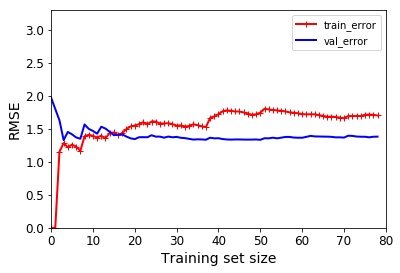

In [29]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3.3])
plt.show()

### Overfitting of polynomial regression

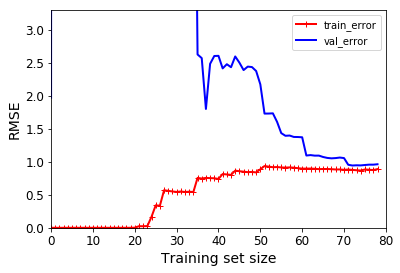

In [30]:
polynomial_regression = Pipeline([
        ('poly_features', PolynomialFeatures(degree=20, include_bias=False)),
        ('lin_reg', LinearRegression())
    ])
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3.3])
plt.show()

### Regularization
#### Ridge Regression
![title](./3.png)
#### LASSO Regression
![title](./4.png)

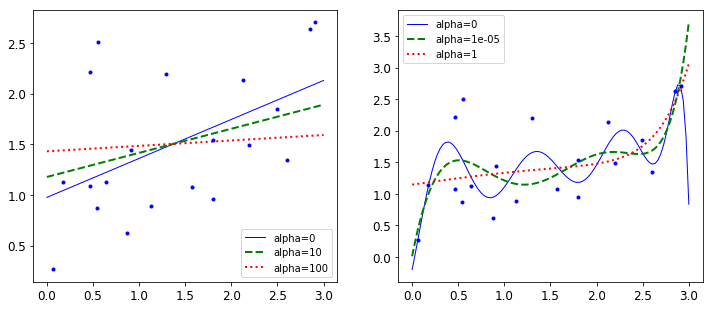

In [50]:
# Ridge
from sklearn.linear_model import Ridge
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 0.5 * X + np.random.randn(m, 1) / 1.5 + 1
# test data
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):
        # a Ridge model
        model = model_class(alpha, **model_kargs)
        if polynomial:
            model = Pipeline([
                ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
                ('std', StandardScaler()),
                ('lin_reg', model)     # use a Ridge Model
            ])
        model.fit(X, y)
        model.predict(X_new)
        # result y is predicted after regulariaztion
        y_new_regul = model.predict(X_new)
        line_width = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=line_width, label='alpha={}'.format(alpha))
    plt.plot(X, y, 'b.', linewidth=3)
    plt.legend()

plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100))
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1))
plt.show()

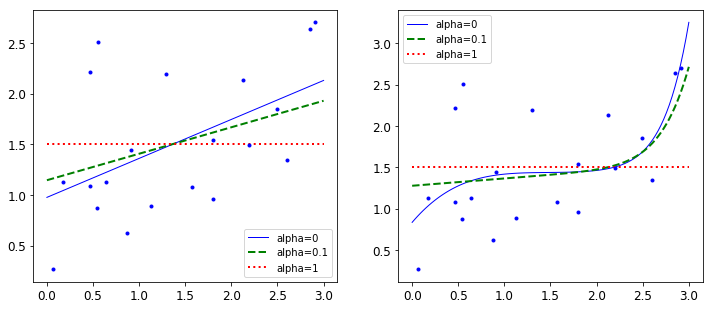

In [51]:
from sklearn.linear_model import Lasso
# Lasso
plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1))
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-1, 1))
plt.show()